# WeatherPy
----

## Instructions:
We'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, we'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

The objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (m/s) vs. Latitude

----

## Observable Trends:
1. There is a Decreasing trend as you move away from the equator for maximum temperature, cloudiness, and humidity
2. There is an increase in variance as you move away from the equator for maximum temperature, cloudiness, and humidity
3. There is an increase in wind speed as you move away from the equator, though the variance seems fairly similar throughout. More tests needed to confirm. 

----
### Installing required package

In [1]:
import sys
!{sys.executable} -m pip install citipy

----
### Dependencies

In [3]:
import requests as req
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from citipy import citipy
import time

----
### Getting our starting data frame of cities

In [4]:
# Randomly sample latitudes
latitude = np.random.uniform(low = -90, high = 90,size = 2000)

# Randomly sample longitudes
longitude = np.random.uniform(low = -180, high = 180,size = 2000)

# Zip latlongs to get the coordinates
coordinates = list(zip(latitude, longitude))

# Creating empty lists
cities = []
countries = []

# Find the nearest city corresponding to the above coordinates
for coord in coordinates:
    lat, lon = coord
    name = citipy.nearest_city(lat, lon).city_name
    country_code = citipy.nearest_city(lat, lon).country_code
    cities.append(name)
    countries.append(country_code)
cities_df = pd.DataFrame({"City":cities, "Country":countries})  

# Drop any duplicate values
cities_df = cities_df.drop_duplicates('City')

# Add columns to the data frame
cities_df["lat"] = ""
cities_df["lon"] = ""
cities_df["humidity"] = ""
cities_df["max temp"] = ""
cities_df["wind speed"] = ""
cities_df["cloudiness"] = ""

# Let's check the data frame
cities_df.head(10)

,City,Country,lat,lon,humidity,max temp,wind speed,cloudiness
0,nikolskoye,ru,,,,,,
1,nizhneyansk,ru,,,,,,
2,hithadhoo,mv,,,,,,
3,dodge city,us,,,,,,
4,illoqqortoormiut,gl,,,,,,
5,wajid,so,,,,,,
6,sentyabrskiy,ru,,,,,,
7,kuching,my,,,,,,
8,sept-iles,ca,,,,,,
9,klaksvik,fo,,,,,,


----
### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# my api key
api_key = "b0a3884a3bb3bd1315ad491aae349295"

# Setting row variables for the retrieval
row_ct = 0
skip = 0

# Loop through the cities and perform API Calls
for index, row in cities_df.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=METRIC&appid=%s" %(row["City"], api_key)
    response = req.get(target_url).json()
    print("retrieving data for #%s: %s" % (row_ct + 1, cities_df.loc[index]["City"]))
    print(target_url)
    row_ct += 1
    
    try:     
        cities_df.set_value(index, "lat", response["coord"]["lat"])
        cities_df.set_value(index, "lon", response["coord"]["lon"])
        cities_df.set_value(index, "humidity", response["main"]["humidity"])
        cities_df.set_value(index, "max temp", response["main"]["temp_max"])
        cities_df.set_value(index, "wind speed", response["wind"]["speed"])
        cities_df.set_value(index, "cloudiness", response["clouds"]["all"])
           
    except:
        skip = skip + 1
        print("skipping a city")
        
    if row_ct % 50 == 0:
        print("Pausing for 10 seconds")
        time.sleep(10)
        
print ("data retrieved")
print (f"{skip} cities were skipped")
print (f"We have the data for {len(cities_df['City'])} cities")

retrieving data for #1: nikolskoye
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #2: nizhneyansk
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #3: hithadhoo
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #4: dodge city
http://api.openweathermap.org/data/2.5/weather?q=dodge city&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #5: illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #6: wajid
http://api.openweathermap.org/data/2.5/weather?q=wajid&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #7: sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?

retrieving data for #58: cockburn harbour
http://api.openweathermap.org/data/2.5/weather?q=cockburn harbour&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #59: hovd
http://api.openweathermap.org/data/2.5/weather?q=hovd&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #60: mocambique
http://api.openweathermap.org/data/2.5/weather?q=mocambique&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #61: barentsburg
http://api.openweathermap.org/data/2.5/weather?q=barentsburg&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #62: talnakh
http://api.openweathermap.org/data/2.5/weather?q=talnakh&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #63: pagman
http://api.openweathermap.org/data/2.5/weather?q=pagman&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #64: leeuwarden
http://api.openweatherma

retrieving data for #114: maracaibo
http://api.openweathermap.org/data/2.5/weather?q=maracaibo&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #115: baena
http://api.openweathermap.org/data/2.5/weather?q=baena&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #116: tori
http://api.openweathermap.org/data/2.5/weather?q=tori&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #117: kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #118: hsinying
http://api.openweathermap.org/data/2.5/weather?q=hsinying&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #119: meulaboh
http://api.openweathermap.org/data/2.5/weather?q=meulaboh&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #120: belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya guba&units=METRIC&appid=b0a3884a3b

retrieving data for #170: chokurdakh
http://api.openweathermap.org/data/2.5/weather?q=chokurdakh&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #171: taltal
http://api.openweathermap.org/data/2.5/weather?q=taltal&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #172: morro bay
http://api.openweathermap.org/data/2.5/weather?q=morro bay&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #173: ranong
http://api.openweathermap.org/data/2.5/weather?q=ranong&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #174: saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #175: nurota
http://api.openweathermap.org/data/2.5/weather?q=nurota&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #176: kissidougou
http://api.openweathermap.org/data/2.5/weather?q=kissidougou&units=METRIC&appid=b0a388

retrieving data for #227: manzhouli
http://api.openweathermap.org/data/2.5/weather?q=manzhouli&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #228: rawson
http://api.openweathermap.org/data/2.5/weather?q=rawson&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #229: manchester
http://api.openweathermap.org/data/2.5/weather?q=manchester&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #230: kurumkan
http://api.openweathermap.org/data/2.5/weather?q=kurumkan&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #231: kristiinankaupunki
http://api.openweathermap.org/data/2.5/weather?q=kristiinankaupunki&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #232: villa oliva
http://api.openweathermap.org/data/2.5/weather?q=villa oliva&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #233: poya
http://api.openweathermap.org/data/2.5/

retrieving data for #283: araouane
http://api.openweathermap.org/data/2.5/weather?q=araouane&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #284: kaitangata
http://api.openweathermap.org/data/2.5/weather?q=kaitangata&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #285: oranjemund
http://api.openweathermap.org/data/2.5/weather?q=oranjemund&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #286: fort nelson
http://api.openweathermap.org/data/2.5/weather?q=fort nelson&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #287: oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?q=oktyabrskoye&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #288: bilma
http://api.openweathermap.org/data/2.5/weather?q=bilma&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #289: oulainen
http://api.openweathermap.org/data/2.5/weather?q=oulainen&units=METRIC&appid=b0

retrieving data for #339: bilibino
http://api.openweathermap.org/data/2.5/weather?q=bilibino&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #340: mehamn
http://api.openweathermap.org/data/2.5/weather?q=mehamn&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #341: vao
http://api.openweathermap.org/data/2.5/weather?q=vao&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #342: rehoboth
http://api.openweathermap.org/data/2.5/weather?q=rehoboth&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #343: leningradskiy
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #344: canberra
http://api.openweathermap.org/data/2.5/weather?q=canberra&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #345: faya
http://api.openweathermap.org/data/2.5/weather?q=faya&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae3492

retrieving data for #395: lokosovo
http://api.openweathermap.org/data/2.5/weather?q=lokosovo&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #396: klyavlino
http://api.openweathermap.org/data/2.5/weather?q=klyavlino&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #397: puerto madryn
http://api.openweathermap.org/data/2.5/weather?q=puerto madryn&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #398: kandrian
http://api.openweathermap.org/data/2.5/weather?q=kandrian&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #399: codrington
http://api.openweathermap.org/data/2.5/weather?q=codrington&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #400: agulu
http://api.openweathermap.org/data/2.5/weather?q=agulu&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
Pausing for 10 seconds
retrieving data for #401: paamiut
http://api.openweathermap.org/data/2.5/weather?q=paamiut&units=

retrieving data for #451: ambanja
http://api.openweathermap.org/data/2.5/weather?q=ambanja&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #452: balkhash
http://api.openweathermap.org/data/2.5/weather?q=balkhash&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #453: usinsk
http://api.openweathermap.org/data/2.5/weather?q=usinsk&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #454: brightwater
http://api.openweathermap.org/data/2.5/weather?q=brightwater&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #455: ajdabiya
http://api.openweathermap.org/data/2.5/weather?q=ajdabiya&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #456: huilong
http://api.openweathermap.org/data/2.5/weather?q=huilong&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #457: camacha
http://api.openweathermap.org/data/2.5/weather?q=camacha&units=METRIC&appid=b0a3884a3bb3bd1315ad49

retrieving data for #508: shetpe
http://api.openweathermap.org/data/2.5/weather?q=shetpe&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #509: swan hill
http://api.openweathermap.org/data/2.5/weather?q=swan hill&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #510: phan thiet
http://api.openweathermap.org/data/2.5/weather?q=phan thiet&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #511: weligama
http://api.openweathermap.org/data/2.5/weather?q=weligama&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #512: flinders
http://api.openweathermap.org/data/2.5/weather?q=flinders&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #513: urdoma
http://api.openweathermap.org/data/2.5/weather?q=urdoma&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #514: hammond
http://api.openweathermap.org/data/2.5/weather?q=hammond&units=METRIC&appid=b0a3884a3bb3bd1315ad49

retrieving data for #564: san quintin
http://api.openweathermap.org/data/2.5/weather?q=san quintin&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #565: louisbourg
http://api.openweathermap.org/data/2.5/weather?q=louisbourg&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #566: dahuk
http://api.openweathermap.org/data/2.5/weather?q=dahuk&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #567: pokanayevka
http://api.openweathermap.org/data/2.5/weather?q=pokanayevka&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #568: agirish
http://api.openweathermap.org/data/2.5/weather?q=agirish&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #569: mareeba
http://api.openweathermap.org/data/2.5/weather?q=mareeba&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #570: neuquen
http://api.openweathermap.org/data/2.5/wea

retrieving data for #619: mehran
http://api.openweathermap.org/data/2.5/weather?q=mehran&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #620: duvan
http://api.openweathermap.org/data/2.5/weather?q=duvan&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #621: denpasar
http://api.openweathermap.org/data/2.5/weather?q=denpasar&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #622: senneterre
http://api.openweathermap.org/data/2.5/weather?q=senneterre&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #623: erie
http://api.openweathermap.org/data/2.5/weather?q=erie&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #624: mangrol
http://api.openweathermap.org/data/2.5/weather?q=mangrol&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #625: uvalde
http://api.openweathermap.org/data/2.5/weather?q=uvalde&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retri

retrieving data for #676: osypenko
http://api.openweathermap.org/data/2.5/weather?q=osypenko&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #677: batesville
http://api.openweathermap.org/data/2.5/weather?q=batesville&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #678: qaqortoq
http://api.openweathermap.org/data/2.5/weather?q=qaqortoq&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #679: zlatoustovsk
http://api.openweathermap.org/data/2.5/weather?q=zlatoustovsk&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
skipping a city
retrieving data for #680: lianran
http://api.openweathermap.org/data/2.5/weather?q=lianran&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #681: ballina
http://api.openweathermap.org/data/2.5/weather?q=ballina&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #682: kungalv
http://api.openweathermap.org/data/2.5/weather?q=kungalv&units=METRIC&ap

retrieving data for #732: qrendi
http://api.openweathermap.org/data/2.5/weather?q=qrendi&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #733: price
http://api.openweathermap.org/data/2.5/weather?q=price&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #734: surgut
http://api.openweathermap.org/data/2.5/weather?q=surgut&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #735: leua
http://api.openweathermap.org/data/2.5/weather?q=leua&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #736: nizhnyaya poyma
http://api.openweathermap.org/data/2.5/weather?q=nizhnyaya poyma&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #737: vizinga
http://api.openweathermap.org/data/2.5/weather?q=vizinga&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295
retrieving data for #738: uhlove
http://api.openweathermap.org/data/2.5/weather?q=uhlove&units=METRIC&appid=b0a3884a3bb3bd1315ad491aae349295

----
### Showing the finished data frame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Dropping NAs
cities_df = cities_df[~cities_df.isin(['NaN', 'NaT', '']).any(axis=1)]

# Saving data frame as a .csv
cities_df.to_csv('cities_df.csv')

# Checking the data frame
cities_df.head(10)

,City,Country,lat,lon,humidity,max temp,wind speed,cloudiness
0,nikolskoye,ru,59.7,30.79,87,7,2,75
2,hithadhoo,mv,-0.6,73.08,100,27.11,2.06,80
3,dodge city,us,37.75,-100.02,26,21,3.1,1
5,wajid,so,3.81,43.25,82,22.49,2.46,48
7,kuching,my,1.56,110.34,94,24,0.5,75
8,sept-iles,ca,50.2,-66.38,93,4,4.6,90
9,klaksvik,fo,62.23,-6.59,87,9,6.7,68
10,puerto ayora,ec,-0.74,-90.35,61,27,4.1,0
11,ushuaia,ar,-54.81,-68.31,65,8,7.7,40
12,zhuhai,cn,40.71,112.04,73,2,2,20


In [14]:
print(f"There is data for {len(cities_df)} cities after dropping missing values")

There is data for 672 cities after dropping missing values


----
### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

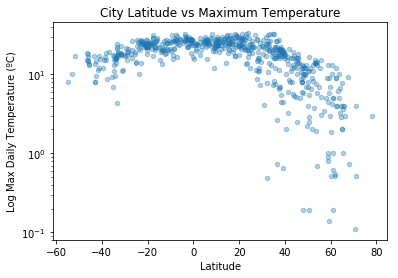

In [16]:
# Using a log transformation so it looks better
cities_df.plot.scatter(["lat"], ["max temp"], marker ='o', facecolors ="b", alpha = 0.35, logy=True)

# Chart title
plt.title("City Latitude vs Maximum Temperature")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Log Max Daily Temperature (ºC)")

# Save an image of the chart and print to screen
# We don't need a legend, graph is pretty self-explanatory
plt.savefig("City Latitude vs Max Temp.png")
plt.show()

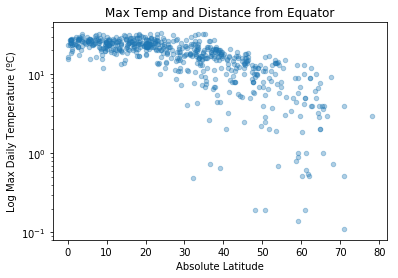

In [17]:
# This is a better way to do it, in my opinion
cities_df['lat_abs'] = cities_df['lat'].abs()
cities_df.plot.scatter(["lat_abs"], ["max temp"], marker ='o', facecolors ="b", alpha = 0.35, logy=True)

# Chart title
plt.title("Max Temp and Distance from Equator")
# x label
plt.xlabel("Absolute Latitude")
# y label
plt.ylabel("Log Max Daily Temperature (ºC)")

# Save an image of the chart and print to screen
# We don't need a legend, graph is pretty self-explanatory
plt.savefig("Max Temp and Distance from Equator.png")
plt.show()

----
#### Latitude vs. Humidity Plot

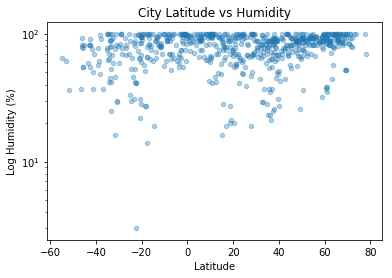

In [18]:
# Using a log transformation so it looks better
cities_df.plot.scatter(["lat"], ["humidity"], marker ='o', facecolors ="b", alpha = 0.35, logy=True)

# Chart title
plt.title("City Latitude vs Humidity")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Log Humidity (%)")

# Save an image of the chart and print to screen
# We don't need a legend, graph is pretty self-explanatory
plt.savefig("City Latitude vs Humidity.png")
plt.show()

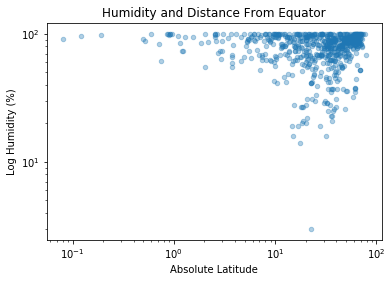

In [19]:
# This is a better way to do it, in my opinion
cities_df.plot.scatter(["lat_abs"], ["humidity"], marker ='o', facecolors ="b", alpha = 0.35, 
                       logy=True, logx=True)

# Chart title
plt.title("Humidity and Distance From Equator")
# x label
plt.xlabel("Absolute Latitude")
# y label
plt.ylabel("Log Humidity (%)")

# Save an image of the chart and print to screen
# We don't need a legend, graph is pretty self-explanatory
plt.savefig("Humidity and Distance From Equator.png")
plt.show()

----
#### Latitude vs. Cloudiness Plot

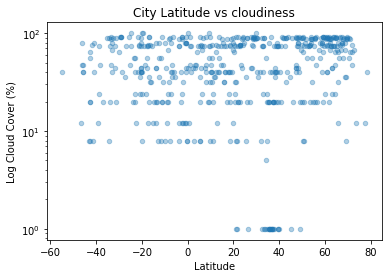

In [20]:
# Using a log transformation so it looks better
cities_df.plot.scatter(["lat"], ["cloudiness"], marker ='o', facecolors ="b", alpha = 0.35, logy=True)

# Chart title
plt.title("City Latitude vs cloudiness")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Log Cloud Cover (%)")

# Save an image of the chart and print to screen
# We don't need a legend, graph is pretty self-explanatory
plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

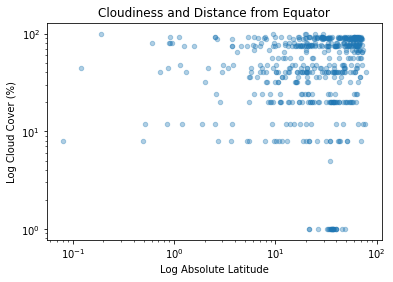

In [21]:
# This is a better way to do it, in my opinion
cities_df.plot.scatter(["lat_abs"], ["cloudiness"], marker ='o', facecolors ="b", alpha = 0.35, 
                       logx=True, logy=True)

# Chart title
plt.title("Cloudiness and Distance from Equator")
# x label
plt.xlabel("Log Absolute Latitude")
# y label
plt.ylabel("Log Cloud Cover (%)")

# Save an image of the chart and print to screen
# We don't need a legend, graph is pretty self-explanatory
plt.savefig("Cloudiness and Distance from Equator.png")
plt.show()

----
#### Latitude vs. Wind Speed Plot

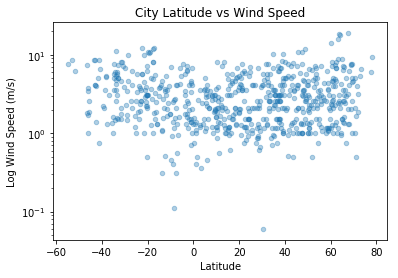

In [22]:
# Using a log transformation so it looks better
cities_df.plot.scatter(["lat"], ["wind speed"], marker ='o', facecolors ="b", alpha = 0.35, logy=True)

# Chart title
plt.title("City Latitude vs Wind Speed")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Log Wind Speed (m/s)")

# Save an image of the chart and print to screen
# We don't need a legend, graph is pretty self-explanatory
plt.savefig("City Latitude vs Wind Speed.png")
plt.show()

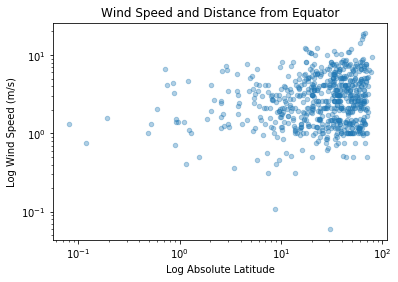

In [23]:
# This is a better way to do it, in my opinion
cities_df.plot.scatter(["lat_abs"], ["wind speed"], marker ='o', facecolors ="b", alpha = 0.35, 
                       logx=True, logy=True)

# Chart title
plt.title("Wind Speed and Distance from Equator")
# x label
plt.xlabel("Log Absolute Latitude")
# y label
plt.ylabel("Log Wind Speed (m/s)")

# Save an image of the chart and print to screen
# We don't need a legend, graph is pretty self-explanatory
plt.savefig("Wind Speed and Distance from Equator.png")
plt.show()